In [53]:
import pandas as pd
import matplotlib.pyplot as plt

class StockAnalysis:
    def __init__(self, filename):
        self.filename = filename
        self.df = None  # Placeholder for DataFrame

    def load_data(self):
        """Load the CSV file into a DataFrame."""
        try:
            self.df = pd.read_csv(self.filename)
            self.df['Date'] = pd.to_datetime(self.df['Date'])  # Convert Date column to datetime
            print("Data Loaded Successfully!")
        except FileNotFoundError:
            print("Error: File not found!")
        except Exception as e:
            print(f"An error occurred: {e}")

    def clean_data(self):
        """Clean and prepare the data."""
        if self.df is not None:
            # Ensure numeric types and drop missing values
            self.df[['Open', 'High', 'Low', 'Close', 'Volume']] = self.df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')
            self.df.dropna(inplace=True)
            print("Data Cleaned Successfully!")
        else:
            print("Error: Data not loaded!")

    def calculate_metrics(self):
        """Calculate Daily Return, Moving Average, and Volatility."""
        if self.df is not None:
            # Daily Return
            self.df['Daily Return'] = self.df['Close'].pct_change()
            self.df['Daily Return'].fillna(self.df['Daily Return'].mean(), inplace=True)

            # 5-Day Moving Average
            self.df['5-Day MA'] = self.df['Close'].rolling(window=5).mean()
            self.df['5-Day MA'].fillna(self.df['5-Day MA'].mean(), inplace=True)

            # Volatility
            self.df['Volatility'] = self.df['Close'].rolling(window=5).std()
            self.df['Volatility'].fillna(self.df['Volatility'].mean(), inplace=True)

            print("Metrics Calculated Successfully!")
        else:
            print("Error: Data not cleaned!")

    def visualize(self):
        """Generate visualizations."""
        if self.df is not None:
            # Plot Closing Prices
            plt.figure(figsize=(10, 6))
            plt.plot(self.df['Date'], self.df['Close'], label='Closing Price', color='blue')
            plt.title('Closing Prices Over Time')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.savefig("closing_prices.png")
            plt.close()

            # Plot Closing Prices with Moving Average
            plt.figure(figsize=(10, 6))
            plt.plot(self.df['Date'], self.df['Close'], label='Closing Price', color='blue')
            plt.plot(self.df['Date'], self.df['5-Day MA'], label='5-Day Moving Average', color='orange')
            plt.title('Closing Prices with Moving Average')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.savefig("moving_average.png")
            plt.close()

            # Plot Daily Returns
            plt.figure(figsize=(10, 6))
            plt.bar(self.df['Date'], self.df['Daily Return'], color='green', label='Daily Return')
            plt.title('Daily Returns Over Time')
            plt.xlabel('Date')
            plt.ylabel('Daily Return')
            plt.legend()
            plt.savefig("daily_returns.png")
            plt.close()

            # Plot Volatility
            plt.figure(figsize=(10, 6))
            plt.plot(self.df['Date'], self.df['Volatility'], label='Volatility', color='red')
            plt.title('Volatility Over Time')
            plt.xlabel('Date')
            plt.ylabel('Volatility')
            plt.legend()
            plt.savefig("volatility.png")
            plt.close()
        else:
            print("Error: Data not available for visualization!")



In [54]:
# Main Execution
if __name__ == "__main__":
    # Step 1: Initialize the class
    analysis = StockAnalysis("shopify_daily.csv")

    # Step 2: Perform the steps
    analysis.load_data()       # Load the data
    analysis.clean_data()      # Clean the data
    analysis.calculate_metrics()  # Calculate metrics
#     analysis.visualize()       # Visualize the results

Data Loaded Successfully!
Data Cleaned Successfully!
Metrics Calculated Successfully!


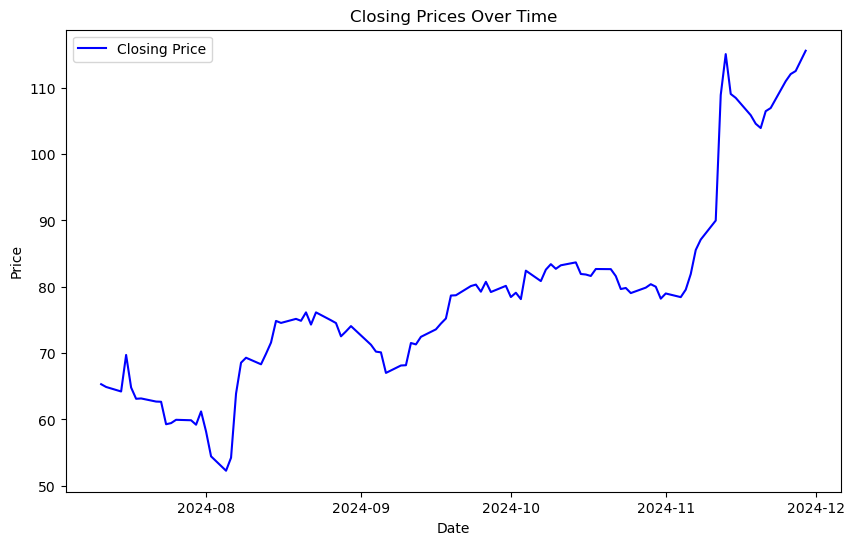

In [47]:
if __name__ == "__main__":
    # Call visualization functions
    plt_closing_prices(df)
    

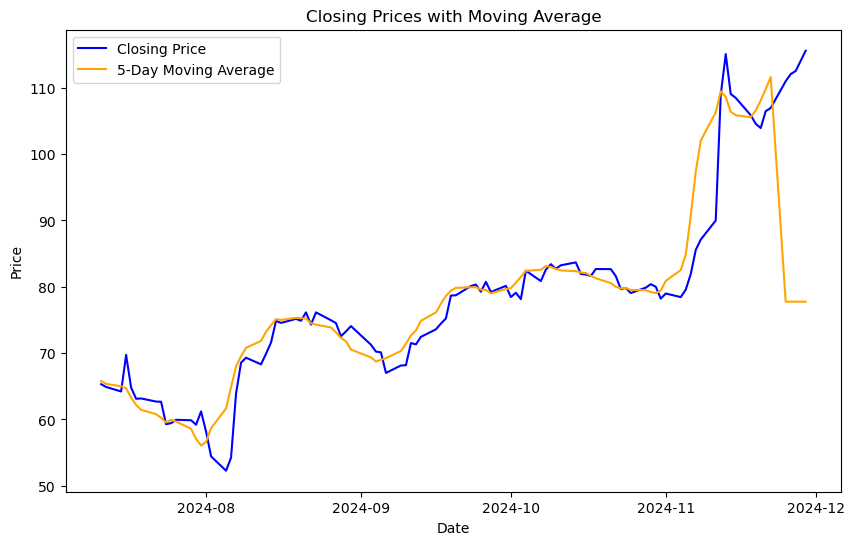

In [48]:
if __name__ == "__main__":
    plot_closing_with_ma(df)

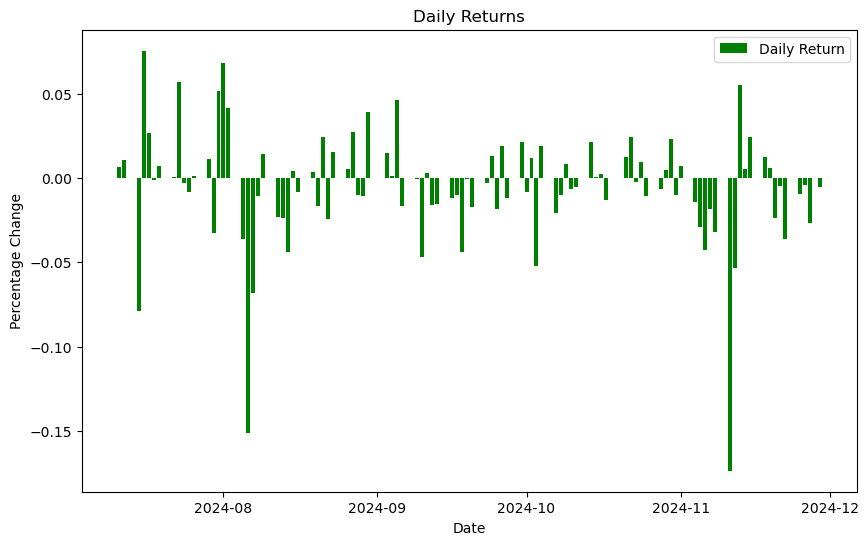

In [49]:
if __name__ == "__main__":
    plot_daily_returns(df)

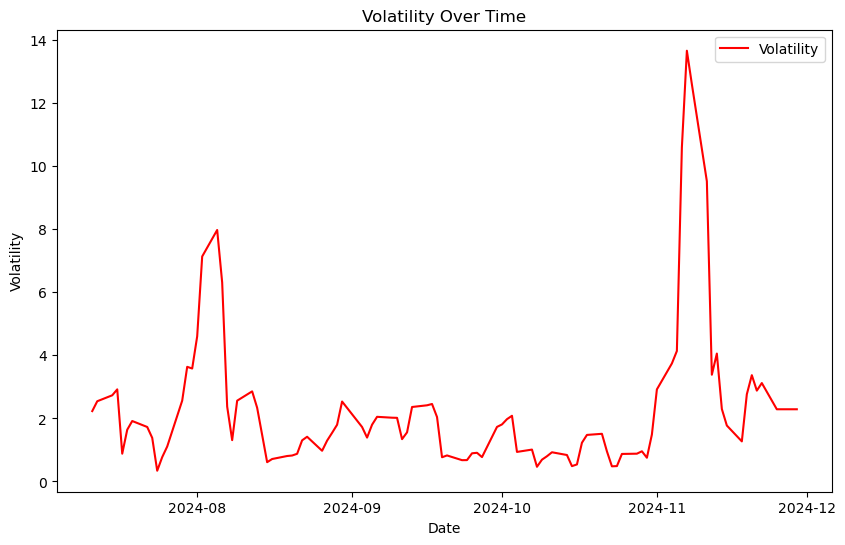

In [50]:
if __name__ == "__main__":
    plot_volatility(df)

In [51]:
df_cleaned.to_csv("cleaned_data.csv", index=False)